<a href="https://colab.research.google.com/github/yinghong7/PySP/blob/master/Sound_Data_Parsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ffprobe
!pip install ffmpeg
!pip install pydub

  Preparing metadata (setup.py) ... done
  Created wheel for ffprobe: filename=ffprobe-0.5-py3-none-any.whl size=3406 sha256=714d40f7326c43d6a852dc45a676dabd7849b96345475cd9127999a068bc9d9a
  Stored in directory: /root/.cache/pip/wheels/a2/66/e3/5da9a7e12ee519eed653b188eb8dd7ca780f5c882922beb15d
Successfully built ffprobe


In [ ]:
#from pydub import AudioSegment
import soundfile as sf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
from librosa import display
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import warnings
from google.colab import drive
from sklearn.preprocessing import LabelBinarizer
warnings.filterwarnings('ignore', category=UserWarning)
from sklearn.metrics import classification_report

**Sound Similarity Check**

In [ ]:
import xml.etree.ElementTree as Xet
def xml_parse (filename):
  xmlparse = Xet.parse(filename)
  root = xmlparse.getroot()

  df = pd.DataFrame()
  df[root[7][0].text] = pd.Series(np.fromstring (root[7][0].attrib['init'], sep=','))
  df[root[7][1].text] = pd.Series(np.fromstring (root[7][1].attrib['init'], sep=','))
  df[root[7][2].text] = pd.Series(np.fromstring (root[7][2].attrib['init'], sep=','))
  df[root[7][3].text] = pd.Series(np.fromstring (root[7][3].attrib['init'], sep=','))
  df[root[7][4].text] = pd.Series(np.fromstring (root[7][4].attrib['init'], sep=','))
  return df

andriod_source = xml_parse ('/content/electrical drill_andriod.com')
iphone_receiver = xml_parse ('/content/electrical drill_iphone.phyphox')
iphone_source = xml_parse ('/content/Electrical drill_hole making_source_02')

In [ ]:
import scipy

andriod_source_f, andriod_source_t, andriod_source_Zxx = scipy.signal.stft(andriod_source['acc'].to_numpy(), 100, nperseg = 512)
andriod_source_log = librosa.amplitude_to_db(np.abs(andriod_source_Zxx))

iphone_receiver_f, iphone_receiver_t, iphone_receiver_Zxx = scipy.signal.stft(iphone_receiver['acc'].to_numpy(), 100, nperseg = 512)
iphone_receiver_log = librosa.amplitude_to_db(np.abs(iphone_receiver_Zxx))

iphone_source_f, iphone_source_t, iphone_source_Zxx = scipy.signal.stft(iphone_source['acc'].to_numpy(), 100, nperseg = 512)
iphone_source_log = librosa.amplitude_to_db(np.abs(iphone_source_Zxx))

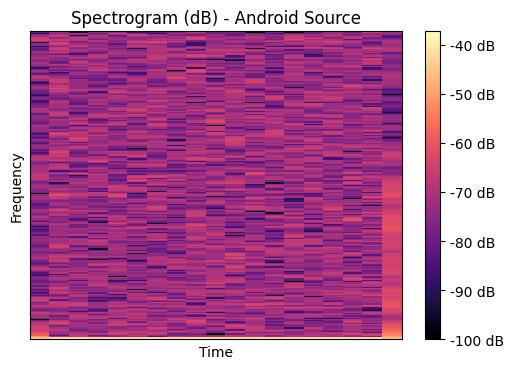

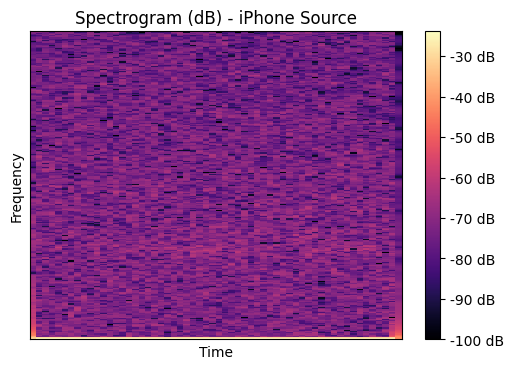

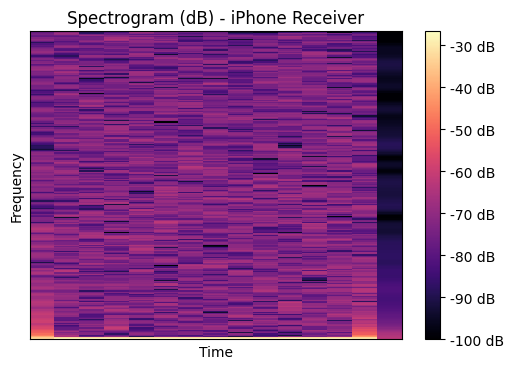

In [ ]:
def log_stft_plot (log_spectrogram, sample_rate, FIG_SIZE, nperseg, title):
  plt.figure (figsize = FIG_SIZE)
  librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length = nperseg - nperseg//2)
  plt.xlabel("Time")
  plt.ylabel ('Frequency')
  plt.colorbar(format="%+2.0f dB")
  plt.title (title)
  plt.show ()
log_stft_plot (andriod_source_log, 100, (6,4), 512, "Spectrogram (dB) - Android Source")
log_stft_plot (iphone_source_log, 100, (6,4), 512, "Spectrogram (dB) - iPhone Source")
log_stft_plot (iphone_receiver_log, 100, (6,4), 512, "Spectrogram (dB) - iPhone Receiver")

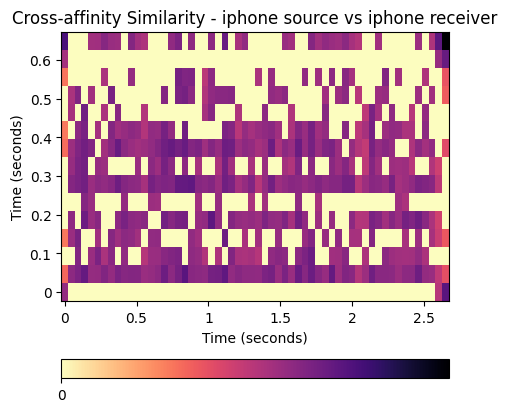

In [ ]:
import matplotlib.pyplot as plt
plt.figure (figsize = (5,5))
xsim = librosa.segment.cross_similarity(iphone_source_log, iphone_receiver_log, metric='cosine')
xsim_aff = librosa.segment.cross_similarity(iphone_source_log, iphone_receiver_log, metric='cosine', mode='affinity')
imgaff = librosa.display.specshow(xsim_aff, x_axis='s', y_axis='s', cmap='magma_r', hop_length=1024)
plt.title('Cross-affinity Similarity - iphone source vs iphone receiver')
plt.colorbar(imgaff, orientation='horizontal', ticks=[0, 1])
plt.show()

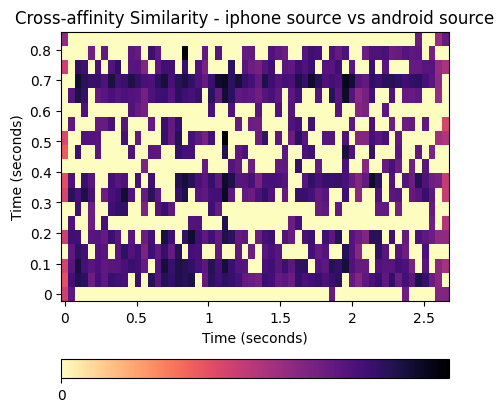

In [ ]:
plt.figure (figsize = (5,5))
xsim = librosa.segment.cross_similarity(iphone_source_log, andriod_source_log, metric='cosine')
xsim_aff = librosa.segment.cross_similarity(iphone_source_log, andriod_source_log, metric='cosine', mode='affinity')
imgaff = librosa.display.specshow(xsim_aff, x_axis='s', y_axis='s', cmap='magma_r', hop_length=1024)
plt.title('Cross-affinity Similarity - iphone source vs android source')
plt.colorbar(imgaff, orientation='horizontal', ticks=[0, 1])
plt.show()

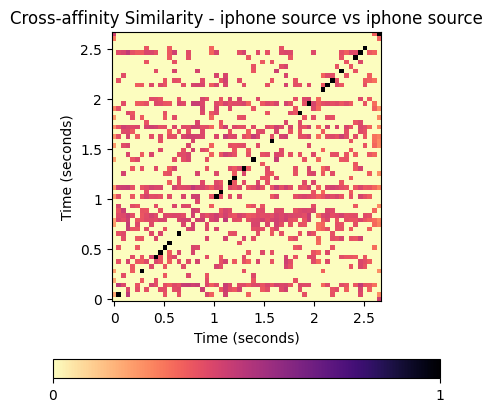

In [ ]:
plt.figure (figsize = (5,5))
xsim = librosa.segment.cross_similarity(iphone_source_log, iphone_source_log, metric='cosine')
xsim_aff = librosa.segment.cross_similarity(iphone_source_log, iphone_source_log, metric='cosine', mode='affinity')
imgaff = librosa.display.specshow(xsim_aff, x_axis='s', y_axis='s', cmap='magma_r', hop_length=1024)
plt.title('Cross-affinity Similarity - iphone source vs iphone source')
plt.colorbar(imgaff, orientation='horizontal', ticks=[0, 1])
plt.show()

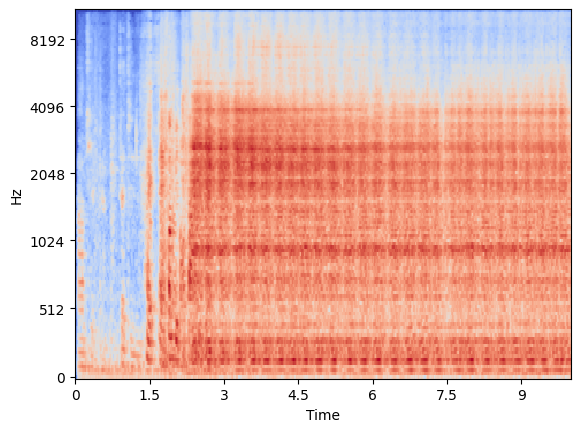

In [ ]:
import librosa
iphone = '/content/Electrical drill_hole making_receiver_1_iphone11_1.wav'
andriod = '/content/Electrical drill_hole making_receiver_1_Samsung_1.wav'

audio_i, sr_i = librosa.load(path = iphone, sr=None)
mels_db_i = librosa.power_to_db(S=librosa.feature.melspectrogram(y=audio_i, sr=sr_i), ref=1.0)
librosa.display.specshow(data=mels_db_i, sr=sr_i, x_axis='time', y_axis='mel')
plt.show()

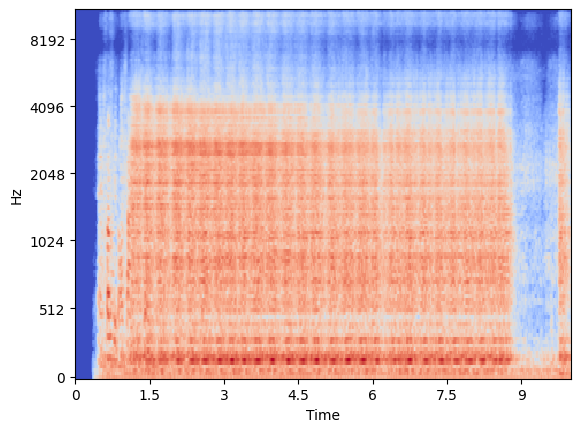

In [ ]:
audio_a, sr_a = librosa.load(path = andriod, sr=None)
mels_db_a = librosa.power_to_db(S=librosa.feature.melspectrogram(y=audio_a, sr=sr_a), ref=1.0)
librosa.display.specshow(data=mels_db_a, sr=sr_a, x_axis='time', y_axis='mel')
plt.show()

In [ ]:
from audio_similarity import AudioSimilarity

iphone = '/content/drive/MyDrive/EPD DATA/Sound/Electrical drill_hole making_receiver_9_iphone11_2.wav'
andriod = '/content/drive/MyDrive/EPD DATA/Sound/Electrical drill_hole making_receiver_10_Samsung_6.wav'

# Set the sample rate and weights for the metrics
weights = {
    'zcr_similarity': 0.2,
    'rhythm_similarity': 0.2,
    'chroma_similarity': 0.2,
    'energy_envelope_similarity': 0.1,
    'spectral_contrast_similarity': 0.1,
    'perceptual_similarity': 0.2
}

verbose = True # Show logs

# Create an instance of the AudioSimilarity class

audio_similarity = AudioSimilarity(iphone, andriod, 1, verbose=verbose, sample_size=1)

# Calculate a single metric

spectral_contrast_similarity = audio_similarity.spectral_contrast_similarity()
print(f"Rhythm Similarity: {spectral_contrast_similarity}")

energy_envelope_similarity = audio_similarity.energy_envelope_similarity()
print(f"Energy Envelope Similarity: {energy_envelope_similarity}")

perceptual_similarity = audio_similarity.perceptual_similarity()
print(f"Perceptual Similarity: {perceptual_similarity}")

Loading comparison files:: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


ParameterError: Frequency band exceeds Nyquist. Reduce either fmin or n_bands.

In [ ]:
feature_list = []
zcr_list=[]
label_list = []

import os, glob
folderpath = '/content/drive/MyDrive/EPD DATA/Sound'
for audio_path in glob.glob(os.path.join(folderpath, '*')):
  audio, sr = librosa.load(path = audio_path, sr=None)
  audio = librosa.effects.time_stretch(y=audio, rate=len(audio)/sr)
  zcr=librosa.feature.zero_crossing_rate(audio)
  zcr_list.append(zcr.flatten())
  # Calculate features and get the label from the filename
  mels = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=231,norm=np.inf)
  mels_db = librosa.power_to_db(S=mels, ref=1.0)
  l = audio_path.split ('/')[-1].split('_')[0]
  if l in ['Handheld less 10', 'Handheld over 10', 'Electrical drill', 'Electrical driller']:
    label_list.append (l)
  else: label_list.append ('Others')
  #feature_list.append(mels_db.reshape((128, 16, 6))) #Use this for CNN
  feature_list.append(mels_db.reshape((6, 2048))) #Use this for LTSM
features = np.array(feature_list)
labels = np.array(label_list)

**LSTM**

In [ ]:
modelLTSM = keras.Sequential(layers=[
    keras.layers.InputLayer(input_shape=features[0].shape),
    keras.layers.Dense(64, activation=keras.activations.relu),
    keras.layers.LSTM(10),
    keras.layers.Dense(4, activation=keras.activations.softmax)])

modelLTSM.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'], run_eagerly=True)
print(modelLTSM.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6, 64)             131136    
                                                                 
 lstm_1 (LSTM)               (None, 10)                3000      
                                                                 
 dense_7 (Dense)             (None, 4)                 44        
                                                                 
Total params: 134180 (524.14 KB)
Trainable params: 134180 (524.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Epoch 1/20
610/610 [==============================] - 47s 77ms/step - loss: 1.2902 - accuracy: 0.4082 - val_loss: 1.2691 - val_accuracy: 0.4618
Epoch 2/20
610/610 [==============================] - 46s 75ms/step - loss: 1.2721 - accuracy: 0.4328 - val_loss: 1.2584 - val_accuracy: 0.4580
Epoch 3/20
610/610 [==============================] - 48s 79ms/step - loss: 1.2636 - accuracy: 0.4426 - val_loss: 1.2714 - val_accuracy: 0.4542
Epoch 4/20
610/610 [==============================] - 49s 80ms/step - loss: 1.2652 - accuracy: 0.4492 - val_loss: 1.2601 - val_accuracy: 0.4542
Epoch 5/20
610/610 [==============================] - 44s 72ms/step - loss: 1.2646 - accuracy: 0.4574 - val_loss: 1.2661 - val_accuracy: 0.4542
Epoch 6/20
610/610 [==============================] - 49s 80ms/step - loss: 1.2653 - accuracy: 0.4557 - val_loss: 1.2539 - val_accuracy: 0.4542
Epoch 7/20
610/610 [==============================] - 49s 80ms/step - loss: 1.2571 - accuracy: 0.4574 - val_loss: 1.2596 - val_accuracy:

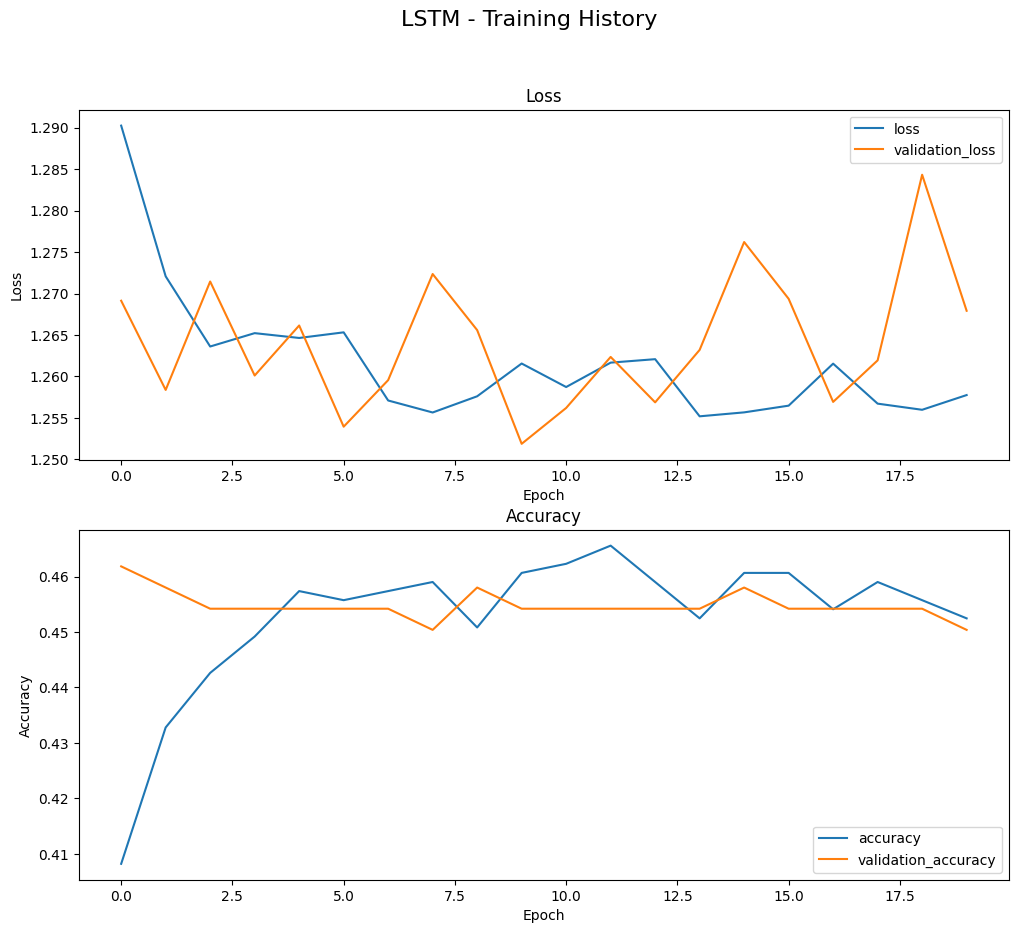

In [ ]:
#Must run for labels
lb = LabelBinarizer()
labels[labels == 'Electrical driller'] = 'Electrical drill'
labelz=lb.fit_transform(labels)
#Model Training and test
TEST_SIZE = 0.3
BATCH_SIZE = 1
EPOCHS = 20

# Split dataset to train and test data
X_train, X_test, y_train, y_test = train_test_split(features, labelz, test_size=TEST_SIZE)

# Train the model
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)#Early Stopping is optional
history = modelLTSM.fit(x=X_train, y=y_train, validation_split=TEST_SIZE, epochs=EPOCHS, batch_size=BATCH_SIZE)

# Plot the training history
fig, axs = plt.subplots(2)
fig.set_size_inches(12, 10)
fig.suptitle('LSTM - Training History', fontsize=16)
axs[0].plot(history.epoch, history.history['loss'], history.history['val_loss'])
axs[0].set(title='Loss', xlabel='Epoch', ylabel='Loss')
axs[0].legend(['loss', 'validation_loss'])
axs[1].plot(history.epoch, history.history['accuracy'], history.history['val_accuracy'])
axs[1].set(title='Accuracy', xlabel='Epoch', ylabel='Accuracy')
axs[1].legend(['accuracy', 'validation_accuracy'])
plt.show()

In [ ]:
#Confusion Matrix
y_predicted = np.argmax(modelLTSM.predict(x=X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
label_names = np.unique(labels)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_predicted)

from sklearn.metrics import precision_score, recall_score, f1_score
print (precision_score (y_true, y_predicted, average = 'weighted'))
print (recall_score (y_true, y_predicted, average = 'weighted'))
print (f1_score (y_true, y_predicted, average = 'weighted'))

12/12 [==============================] - 0s 20ms/step
0.2575615623467887
0.3973333333333333
0.2935337333448186


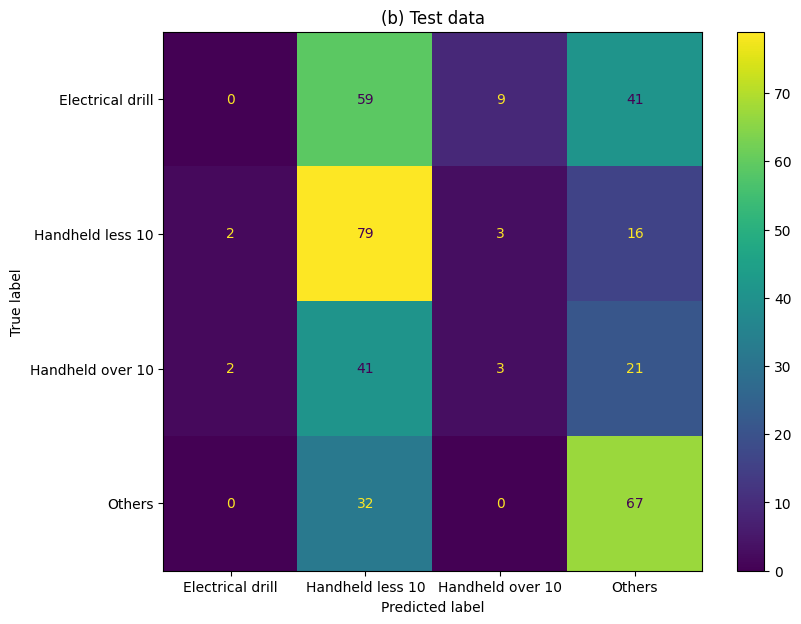

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
fig, ax = plt.subplots(figsize=(9,7))
disp.plot(ax = ax)
plt.title ('(b) Test data')
plt.show()

**CNN**

In [ ]:
#Original model using only spectrogram feature. Currently working version.
model = keras.Sequential(layers=[ #CNN Model
        keras.layers.InputLayer(input_shape=features[0].shape),
        keras.layers.Conv2D(16, 3, padding='same', activation=keras.activations.relu),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(32, 3, padding='same', activation=keras.activations.relu),
        keras.layers.MaxPooling2D(),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation=keras.activations.relu),
        keras.layers.Dense(4, activation=keras.activations.softmax)
    ])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'], run_eagerly=True)
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 16, 16)       880       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 8, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 8, 32)         4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 4, 32)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dropout_1 (Dropout)         (None, 4096)             

In [ ]:
#Must run for labels
lb = LabelBinarizer()
labels[labels == 'Electrical driller'] = 'Electrical drill'
labelz=lb.fit_transform(labels)

Epoch 1/20
610/610 [==============================] - 42s 69ms/step - loss: 2.0379 - accuracy: 0.5590 - val_loss: 0.9152 - val_accuracy: 0.7099
Epoch 2/20
610/610 [==============================] - 38s 63ms/step - loss: 0.8637 - accuracy: 0.7000 - val_loss: 0.8079 - val_accuracy: 0.7290
Epoch 3/20
610/610 [==============================] - 38s 62ms/step - loss: 0.8137 - accuracy: 0.7213 - val_loss: 0.4716 - val_accuracy: 0.8244
Epoch 4/20
610/610 [==============================] - 38s 62ms/step - loss: 0.5466 - accuracy: 0.8066 - val_loss: 0.4618 - val_accuracy: 0.8321
Epoch 5/20
610/610 [==============================] - 38s 62ms/step - loss: 0.5384 - accuracy: 0.8262 - val_loss: 0.5639 - val_accuracy: 0.8015
Epoch 6/20
610/610 [==============================] - 37s 61ms/step - loss: 0.6185 - accuracy: 0.8115 - val_loss: 1.2227 - val_accuracy: 0.7443
Epoch 7/20
610/610 [==============================] - 40s 65ms/step - loss: 0.3619 - accuracy: 0.8885 - val_loss: 0.3798 - val_accuracy:

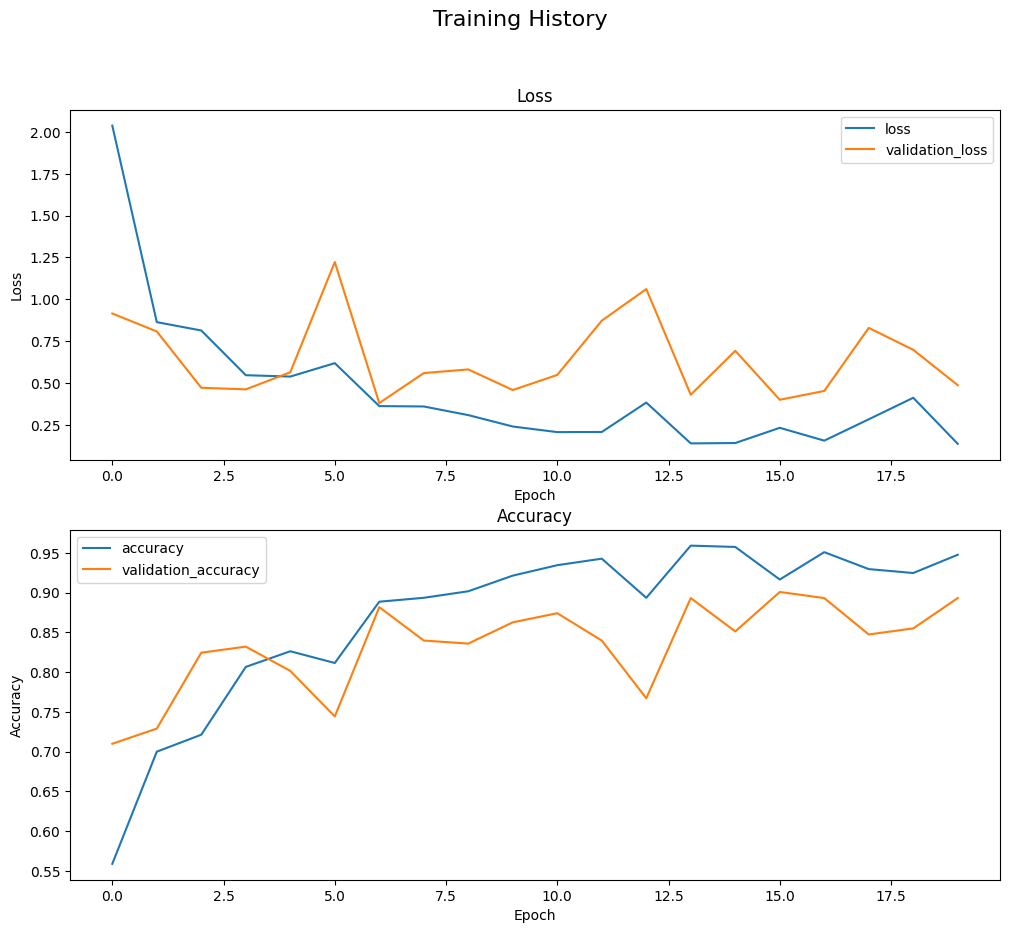

In [ ]:
#Model Training and test
TEST_SIZE = 0.3
BATCH_SIZE = 1
EPOCHS = 20

# Split dataset to train and test data
X_train, X_test, y_train, y_test = train_test_split(features, labelz, test_size=TEST_SIZE)

# Train the model
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)#Early Stopping is optional
history = model.fit(x=X_train, y=y_train, validation_split=TEST_SIZE, epochs=EPOCHS, batch_size=BATCH_SIZE)
#history = modelLTSM.fit(x=X_train, y=y_train, validation_split=TEST_SIZE, epochs=EPOCHS, batch_size=BATCH_SIZE,callbacks=[early_stopping])

# Plot the training history
fig, axs = plt.subplots(2)
fig.set_size_inches(12, 10)
fig.suptitle('Training History', fontsize=16)
axs[0].plot(history.epoch, history.history['loss'], history.history['val_loss'])
axs[0].set(title='Loss', xlabel='Epoch', ylabel='Loss')
axs[0].legend(['loss', 'validation_loss'])
axs[1].plot(history.epoch, history.history['accuracy'], history.history['val_accuracy'])
axs[1].set(title='Accuracy', xlabel='Epoch', ylabel='Accuracy')
axs[1].legend(['accuracy', 'validation_accuracy'])
plt.show()

In [ ]:
#Confusion Matrix
y_predicted = np.argmax(model.predict(x=X_train), axis=1)
y_true = np.argmax(y_train, axis=1)
label_names = np.unique(labels)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_predicted)

28/28 [==============================] - 2s 86ms/step


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print (precision_score (y_true, y_predicted, average = 'weighted'))
print (recall_score (y_true, y_predicted, average = 'weighted'))
print (f1_score (y_true, y_predicted, average = 'weighted'))

0.9527037492214363
0.9518348623853211
0.9517609625065026


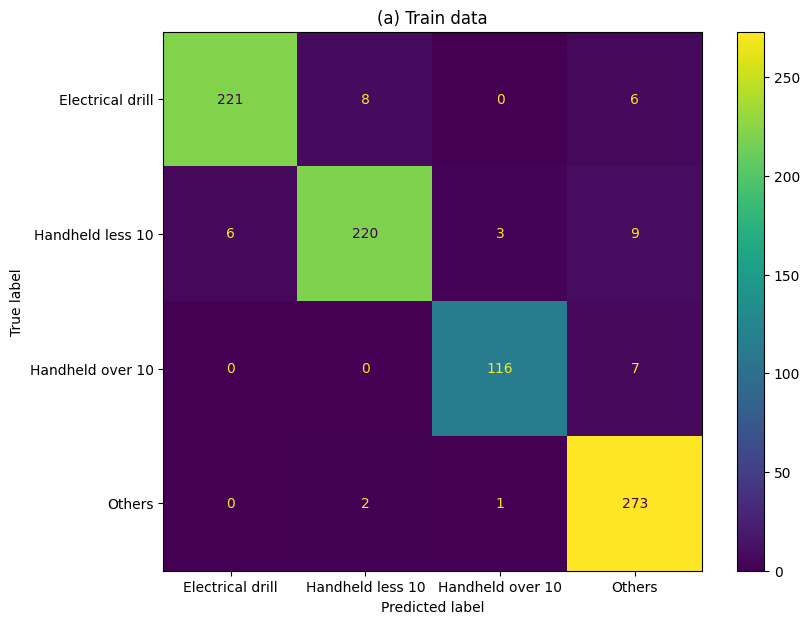

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
fig, ax = plt.subplots(figsize=(9,7))
disp.plot(ax = ax)
plt.title ('(a) Train data')
plt.show()

In [ ]:
import os, glob
folderpath = '/content/drive/MyDrive/EPD DATA/Sound'
l_list = []
for audio_path in glob.glob(os.path.join(folderpath, '*')):
  l_list.append (audio_path.split ('/')[-1].split('_')[0])
my_dict = {i:l_list.count(i) for i in l_list}
print (my_dict)

{'Blade saw': 192, 'Electrical driller': 90, 'Handheld less 10': 356, 'Fastening machine': 45, 'Electrical drill': 256, 'Handheld over 10': 173, 'Pneumatic driver': 97, 'Fastening': 38}
